## Check Current Version Of Python

In [1]:
###import sys
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [488]:
##%%script C:\Users\lawre\AppData\Local\Programs\Python\Python38-32\python.exe
##%%script C:\Users\lawre\AppData\Local\Programs\Python\Python39\python.exe
import sys 
print("User Current Version:-", sys.version)

User Current Version:- 3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]


## Connecting To Snowflake Database

In [11]:
from snowflake.snowpark import Session

conn = {
  "account": "",
  "user": "",
  "password": "",
  "role": "",
  "warehouse": "",
  "database": "",
  "schema": ""
 }

session = Session.builder.configs(conn).create()
print(session.sql("select current_warehouse(), current_database(), current_schema()").collect())  

[Row(CURRENT_WAREHOUSE()='COMPUTE_WH', CURRENT_DATABASE()='CREDIT_CARD_APPROVAL_PREDICTION', CURRENT_SCHEMA()='PUBLIC')]


## Creating DataFrames From Snowflake Tables

In [12]:
FILTER_APP_RECORD = session.table('FILTER_APP_RECORD')
FILTER_APP_RECORD.toPandas()
FAR_df = FILTER_APP_RECORD.toPandas()


In [13]:
FAR_df

,ID,STATUS,COUNT,GENDER,OWN_A_CAR,OWN_A_PROPERTY,NUMBER_OF_CHILDREN,INCOME,EMPLOMENT_STATUS,EDUCATION_LEVEL,MARITAL_STATUS,TYPE_OF_HOUSING,AGE,EMPLOMENT_LENGTH,HAS_A_PHONE,HAS_A_WORK_PHONE,HAS_HOUSE_PHONE,HAS_AN_EMAIL,JOB_TITLE,FAMILY_MEMBERS_COUNT
0,5008804,C,13,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2
1,5008804,1,1,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2
2,5008804,0,1,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2
3,5008804,X,1,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2
4,5008805,C,12,M,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74869,5150483,X,18,F,Y,Y,1,157500,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3
74870,5150484,C,1,F,Y,Y,1,157500,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3
74871,5150484,0,12,F,Y,Y,1,157500,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3
74872,5150485,0,2,F,Y,Y,1,157500,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3



## Summary

In [491]:
FAR_df.describe()

,ID,COUNT,NUMBER_OF_CHILDREN,INCOME,AGE,EMPLOMENT_LENGTH,HAS_A_PHONE,HAS_A_WORK_PHONE,HAS_HOUSE_PHONE,HAS_AN_EMAIL,FAMILY_MEMBERS_COUNT
count,7.487400e+04,74874.000000,74874.000000,7.487400e+04,74874.000000,74874.000000,74874.0,74874.000000,74874.000000,74874.000000,74874.000000
mean,5.078092e+06,10.386983,0.428280,1.871096e+05,-15997.925208,59331.321367,1.0,0.226781,0.294962,0.090472,2.196784
std,4.186183e+04,10.952920,0.739141,1.030883e+05,4203.539867,137732.450913,0.0,0.418753,0.456029,0.286859,0.908533
min,5.008804e+06,1.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.042016e+06,2.000000,0.000000,1.215000e+05,-19463.250000,-3165.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.069514e+06,6.000000,0.000000,1.575000e+05,-15598.000000,-1567.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.114636e+06,14.000000,1.000000,2.250000e+05,-12461.000000,-413.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,61.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [492]:
FAR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74874 entries, 0 to 74873
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    74874 non-null  int32 
 1   STATUS                74874 non-null  object
 2   COUNT                 74874 non-null  int64 
 3   GENDER                74874 non-null  object
 4   OWN_A_CAR             74874 non-null  object
 5   OWN_A_PROPERTY        74874 non-null  object
 6   NUMBER_OF_CHILDREN    74874 non-null  int8  
 7   INCOME                74874 non-null  int32 
 8   EMPLOMENT_STATUS      74874 non-null  object
 9   EDUCATION_LEVEL       74874 non-null  object
 10  MARITAL_STATUS        74874 non-null  object
 11  TYPE_OF_HOUSING       74874 non-null  object
 12  AGE                   74874 non-null  int16 
 13  EMPLOMENT_LENGTH      74874 non-null  int32 
 14  HAS_A_PHONE           74874 non-null  int8  
 15  HAS_A_WORK_PHONE      74874 non-null

In [497]:
FAR_df.mean()

C:\Users\lawre\AppData\Local\Temp\ipykernel_11024\67317551.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  FAR_df.mean()


ID                      5.078092e+06
COUNT                   1.038698e+01
NUMBER_OF_CHILDREN      4.282795e-01
INCOME                  1.871096e+05
AGE                    -1.599793e+04
EMPLOMENT_LENGTH        5.933132e+04
HAS_A_PHONE             1.000000e+00
HAS_A_WORK_PHONE        2.267810e-01
HAS_HOUSE_PHONE         2.949622e-01
HAS_AN_EMAIL            9.047199e-02
FAMILY_MEMBERS_COUNT    2.196784e+00
dtype: float64

In [494]:
print('Missing data count in each row')
print(FAR_df.isnull().sum())

Missing data count in each row
ID                          0
STATUS                      0
COUNT                       0
GENDER                      0
OWN_A_CAR                   0
OWN_A_PROPERTY              0
NUMBER_OF_CHILDREN          0
INCOME                      0
EMPLOMENT_STATUS            0
EDUCATION_LEVEL             0
MARITAL_STATUS              0
TYPE_OF_HOUSING             0
AGE                         0
EMPLOMENT_LENGTH            0
HAS_A_PHONE                 0
HAS_A_WORK_PHONE            0
HAS_HOUSE_PHONE             0
HAS_AN_EMAIL                0
JOB_TITLE               23264
FAMILY_MEMBERS_COUNT        0
dtype: int64


In [70]:
print('Number of Rows In Table')
print(len(FAR_df))

Number of Rows In Table
74874


## Matrix

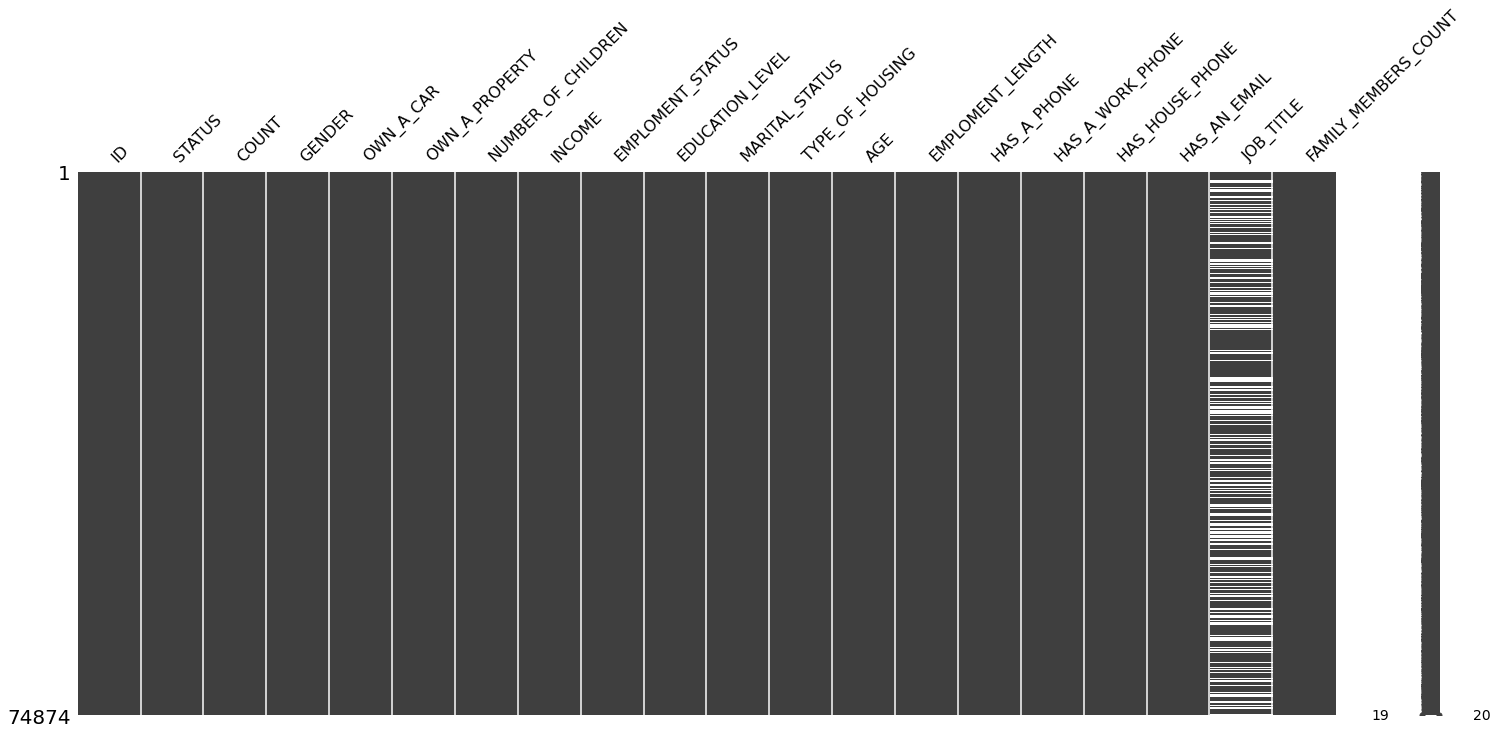

In [495]:
msno.matrix(FAR_df)
plt.show()

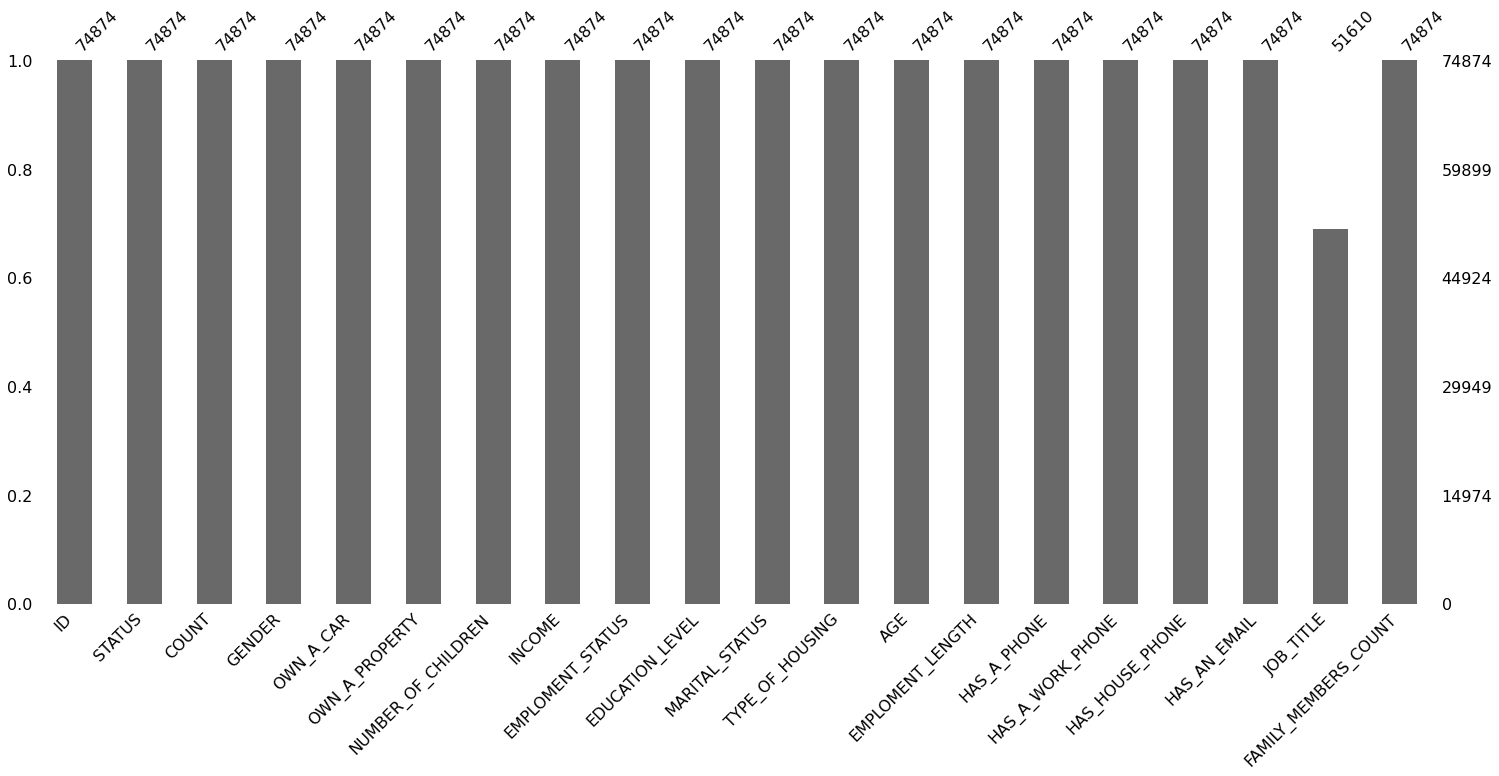

In [128]:
msno.bar(FAR_df)
plt.show()

# BY STATUS

#### 0: 1-29 days past due
#### 1: 30-59 days past due 
#### 2: 60-89 days overdue 
#### 3: 90-119 days overdue 
#### 4: 120-149 days overdue 
#### 5: Overdue or bad debts, write-offs for more than 150 days 
#### C: paid off that month 
#### X: No loan for the month

In [14]:
sql_order_status_count = session.sql("""
SELECT STATUS, COUNT(STATUS) as COUNT
FROM FILTER_APP_RECORD
GROUP BY STATUS
ORDER BY STATUS""")

sql_order_status_count.toPandas()

,STATUS,COUNT
0,0,31963
1,1,4149
2,2,555
3,3,248
4,4,181
5,5,180
6,C,17950
7,X,19648


<AxesSubplot:>

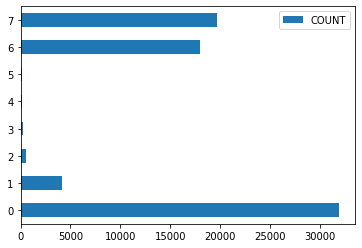

In [15]:
sql_order_status_count.toPandas().plot.barh()

## BY GENDER

In [339]:
FILTERING_BY_GENDER = session.sql("""
SELECT GENDER, COUNT(GENDER) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY GENDER
ORDER BY GENDER""")

FILTERING_BY_GENDER.toPandas()

,GENDER,TOTAL
0,F,50074
1,M,24800


<AxesSubplot:xlabel='GENDER'>

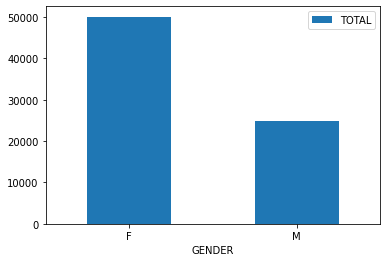

In [345]:
FILTERING_BY_GENDER.toPandas().set_index("""GENDER""").plot.bar(rot=0)

## BY OWN A CAR 

In [212]:
## OWN A CAR

OWN_A_CAR = session.sql("""
SELECT DISTINCT OWN_A_CAR, COUNT(OWN_A_CAR) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY OWN_A_CAR""")

OWN_A_CAR.toPandas()

,OWN_A_CAR,TOTAL
0,Y,28395
1,N,46479


<AxesSubplot:xlabel='OWN_A_CAR'>

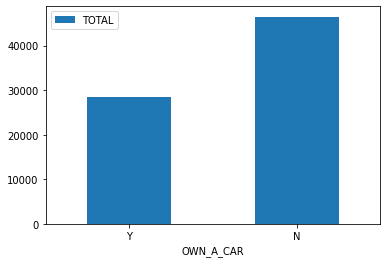

In [216]:
OWN_A_CAR.toPandas().set_index("""OWN_A_CAR""").plot.bar(rot=0)

## OWN A PROPERTY

In [222]:
# OWN A PROPERTY
OWN_A_PROPERTY = session.sql("""
SELECT DISTINCT OWN_A_PROPERTY, COUNT(OWN_A_PROPERTY) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY OWN_A_PROPERTY""")

OWN_A_PROPERTY.toPandas()

,OWN_A_PROPERTY,TOTAL
0,Y,50057
1,N,24817


<AxesSubplot:xlabel='OWN_A_PROPERTY'>

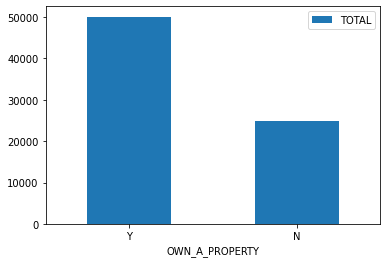

In [223]:
OWN_A_PROPERTY.toPandas().set_index("""OWN_A_PROPERTY""").plot.bar(rot=0)

## NUMBER OF CHILDREN

In [458]:
##Number of children
NUMBER_OF_CHILDREN = session.sql("""
SELECT DISTINCT NUMBER_OF_CHILDREN, COUNT(NUMBER_OF_CHILDREN) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY NUMBER_OF_CHILDREN
ORDER BY NUMBER_OF_CHILDREN
;""")

NUMBER_OF_CHILDREN.toPandas()

,NUMBER_OF_CHILDREN,TOTAL
0,0,51927
1,1,15167
2,2,6742
3,3,867
4,4,120
5,5,38
6,7,6
7,14,6
8,19,1


<AxesSubplot:ylabel='NUMBER_OF_CHILDREN'>

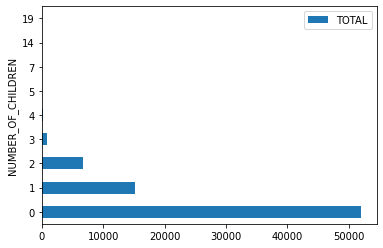

In [466]:
NUMBER_OF_CHILDREN.toPandas().set_index("""NUMBER_OF_CHILDREN""").plot.barh()

## INCOME

In [277]:
#Poor or Near Poor
Poor_or_Near_Poor = session.sql( """SELECT SUM(TOTAL) AS TOTAL
FROM (SELECT COUNT(INCOME) AS TOTAL
FROM FILTER_APP_RECORD
WHERE INCOME <= 32048
GROUP BY INCOME)""")

#LOW MIDDLE INCOME
LOW_MIDDLE_INCOME = session.sql( """SELECT SUM(TOTAL) AS TOTAL
FROM (SELECT COUNT(INCOME) AS TOTAL
FROM FILTER_APP_RECORD
WHERE INCOME BETWEEN 32048 AND 53413
GROUP BY INCOME)""")

# MIDDLE INCOME
MIDDLE_INCOME = session.sql( """SELECT SUM(TOTAL) AS TOTAL
FROM (SELECT COUNT(INCOME) AS TOTAL
FROM FILTER_APP_RECORD
WHERE INCOME BETWEEN 53413 and 106827
GROUP BY INCOME)""")

#UPPER MIDDLE INCOME
UPPER_MIDDLE_INCOME = session.sql( """SELECT SUM(TOTAL) AS TOTAL
FROM (SELECT COUNT(INCOME) AS TOTAL
FROM FILTER_APP_RECORD
WHERE INCOME BETWEEN 106827 and 373894
GROUP BY INCOME)""")

#RICH INCOME
RICH_INCOME = session.sql( """SELECT SUM(TOTAL) AS TOTAL
FROM (SELECT COUNT(INCOME) AS TOTAL
FROM FILTER_APP_RECORD
WHERE INCOME >= 373894
GROUP BY INCOME)""")




poor = Poor_or_Near_Poor.toPandas()
low_middle = LOW_MIDDLE_INCOME.toPandas()
middle = MIDDLE_INCOME.toPandas()
upper_middle = UPPER_MIDDLE_INCOME.toPandas()
rich = RICH_INCOME.toPandas()


print(poor, low_middle,middle,upper_middle,rich)
print(poor + low_middle + middle + upper_middle +rich)



   TOTAL
0     55    TOTAL
0    615    TOTAL
0  10535    TOTAL
0  60467    TOTAL
0   3202
   TOTAL
0  74874


In [308]:
a = ['55', '615', '10535','60467' ,'3202' ]

# print in new line
#print("Applicants based on Income")
df = pd.DataFrame(a, columns =['Applicants based on Income'], index=['Poor:', 'Low Middle:', 'Middle:' ,'Upper Middle:', 'Rich:'])
df

#print(*a, sep = "\n")


,Applicants based on Income
Poor:,55
Low Middle:,615
Middle:,10535
Upper Middle:,60467
Rich:,3202


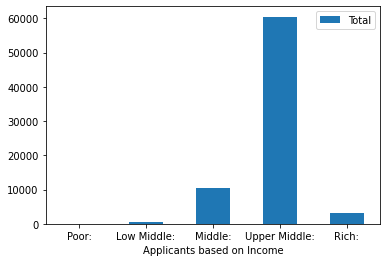

In [316]:
df = pd.DataFrame({'Applicants based on Income':['Poor:', 'Low Middle:', 'Middle:' ,'Upper Middle:', 'Rich:'], 'Total':[55, 615, 10535,60467 ,3202]})
ax = df.plot.bar(x='Applicants based on Income', y='Total', rot=0)

## EMPLOYMENT STATUS

In [318]:
##BY EMPLOYMENT STATUS
EMPLOYMENT_STATUS = session.sql("""SELECT EMPLOMENT_STATUS, COUNT(EMPLOMENT_STATUS) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY EMPLOMENT_STATUS""")

EMPLOYMENT_STATUS.toPandas()

,EMPLOMENT_STATUS,TOTAL
0,Working,38443
1,Commercial associate,17501
2,Pensioner,12697
3,State servant,6204
4,Student,29


<AxesSubplot:ylabel='EMPLOMENT_STATUS'>

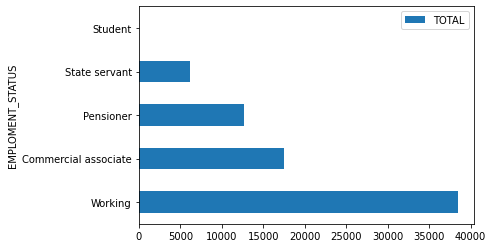

In [325]:
##BY EMPLOYMENT STATUS
EMPLOYMENT_STATUS = session.sql("""SELECT EMPLOMENT_STATUS, COUNT(EMPLOMENT_STATUS) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY EMPLOMENT_STATUS""")

EMPLOYMENT_STATUS.toPandas().set_index("""EMPLOMENT_STATUS""").plot.barh()

## EDUCATION LEVEL

In [322]:
##EDUCATION TYPE
EDUCATION_LEVEL = session.sql("""SELECT EDUCATION_LEVEL , COUNT(EDUCATION_LEVEL) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY EDUCATION_LEVEL
;""")

EDUCATION_LEVEL.toPandas().set_index("""EDUCATION_LEVEL""")

,EDUCATION_LEVEL,TOTAL,PERCENTAGE
0,Higher education,20412,0.272618
1,Secondary / secondary special,50627,0.676163
2,Lower secondary,807,0.010778
3,Academic degree,76,0.001015
4,Incomplete higher,2952,0.039426


<AxesSubplot:ylabel='EDUCATION_LEVEL'>

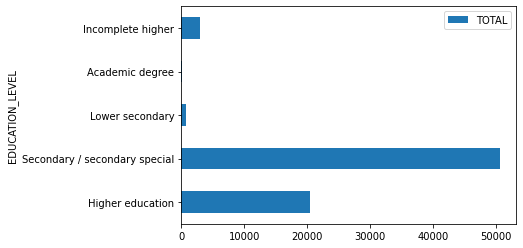

In [324]:
##EDUCATION TYPE
EDUCATION_LEVEL = session.sql("""SELECT EDUCATION_LEVEL , COUNT(EDUCATION_LEVEL) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY EDUCATION_LEVEL
;""")

EDUCATION_LEVEL.toPandas().set_index("""EDUCATION_LEVEL""").plot.barh()

## MARITAL STATUS

In [263]:
#  MARITAL_STATUS
MARITAL_STATUS = session.sql("""SELECT MARITAL_STATUS, COUNT(MARITAL_STATUS) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY MARITAL_STATUS
;""")
    
MARITAL_STATUS.toPandas()

,MARITAL_STATUS,TOTAL
0,Civil marriage,6059
1,Married,51430
2,Single / not married,9872
3,Separated,4362
4,Widow,3151


<AxesSubplot:ylabel='MARITAL_STATUS'>

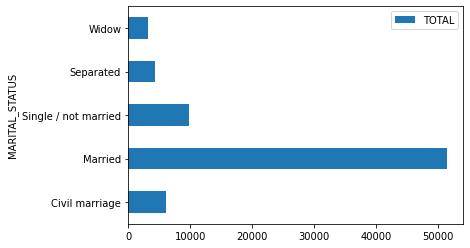

In [343]:
#  MARITAL_STATUS
MARITAL_STATUS = session.sql("""SELECT MARITAL_STATUS, COUNT(MARITAL_STATUS) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY MARITAL_STATUS
;""")
    
MARITAL_STATUS.toPandas().set_index("""MARITAL_STATUS""").plot.barh()

## HOUSING TYPE

In [347]:
##HOUSING TYPE
HOUSING_TYPE = session.sql("""
SELECT TYPE_OF_HOUSING, COUNT(TYPE_OF_HOUSING) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY TYPE_OF_HOUSING;""")

HOUSING_TYPE.toPandas()

,TYPE_OF_HOUSING,TOTAL
0,Rented apartment,1182
1,House / apartment,66780
2,With parents,3637
3,Municipal apartment,2390
4,Co-op apartment,336
5,Office apartment,549


<AxesSubplot:ylabel='TYPE_OF_HOUSING'>

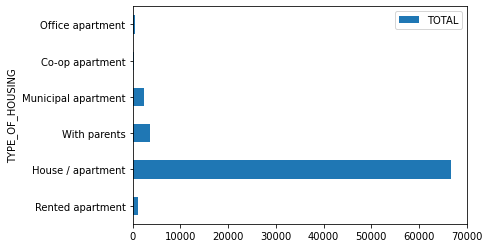

In [348]:
HOUSING_TYPE.toPandas().set_index("""TYPE_OF_HOUSING""").plot.barh()

## BY AGE 

In [368]:
##BY AGE
BY_AGE = session.sql("""
SELECT ROUND(AGE/365) AS YEARS_OLD, count(YEARS_OLD) AS TOTAL 
FROM FILTER_APP_RECORD
WHERE YEARS_OLD BETWEEN '-80' AND '-20'
GROUP BY YEARS_OLD
ORDER BY YEARS_OLD""")


x = BY_AGE.toPandas()
abs(x)

,YEARS_OLD,TOTAL
0,69,13
1,68,184
2,67,456
3,66,503
4,65,947
5,64,1196
6,63,1133
7,62,1252
8,61,1478
9,60,1682


In [433]:
##Order by Total
BY_AGE = session.sql("""
SELECT ROUND(AGE/365) AS YEARS_OLD, count(YEARS_OLD) AS TOTAL 
FROM FILTER_APP_RECORD
WHERE YEARS_OLD BETWEEN '-80' AND '-20'
GROUP BY YEARS_OLD
ORDER BY TOTAL DESC""")


x = BY_AGE.toPandas()
abs(x)

,YEARS_OLD,TOTAL
0,39,2428
1,40,2302
2,29,2281
3,37,2275
4,34,2264
5,28,2254
6,41,2235
7,35,2161
8,30,2147
9,42,2137


<AxesSubplot:>

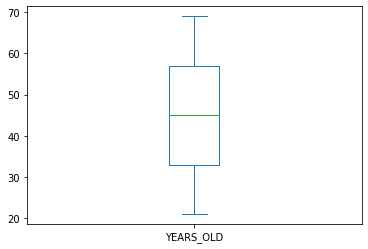

In [434]:
##Box Table
BY_AGE = session.sql("""
SELECT ABS(YEARS_OLD) AS YEARS_OLD
FROM (SELECT ROUND(AGE/365) AS YEARS_OLD
FROM FILTER_APP_RECORD
WHERE YEARS_OLD BETWEEN -80 AND -20
GROUP BY YEARS_OLD
) 
ORDER BY YEARS_OLD""")


x = BY_AGE.toPandas().plot.box()
x

## DAYS EMPLOYED

In [436]:
## YEARS EMPLOYED DESC
DAYS_EMPLOYED = session.sql("""
SELECT ROUND(EMPLOMENT_LENGTH/365) AS YEARS_EMPLOYED
FROM FILTER_APP_RECORD
WHERE YEARS_EMPLOYED BETWEEN -50 AND -1
GROUP BY YEARS_EMPLOYED
ORDER BY YEARS_EMPLOYED
;""")

x = DAYS_EMPLOYED.toPandas()
abs(x)

,YEARS_EMPLOYED
0,43
1,42
2,41
3,40
4,39
5,38
6,37
7,36
8,35
9,34


<AxesSubplot:>

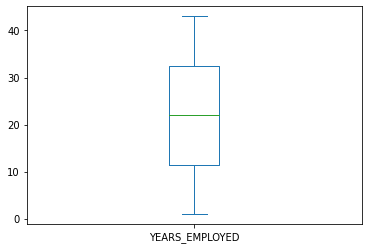

In [445]:
DAYS_EMPLOYED = session.sql("""
SELECT ABS(YEARS_EMPLOYED) AS YEARS_EMPLOYED
FROM (SELECT ROUND(EMPLOMENT_LENGTH/365) AS YEARS_EMPLOYED
FROM FILTER_APP_RECORD
WHERE YEARS_EMPLOYED BETWEEN -50 AND -1
GROUP BY YEARS_EMPLOYED)
ORDER BY YEARS_EMPLOYED
""")

x = DAYS_EMPLOYED.toPandas().plot.box()
x

## HAS A PHONE

In [449]:
##FILTERING TO SEE HOW MANY PEOPLE HAS A PHONE

HAS_A_PHONE = session.sql("""
SELECT HAS_A_PHONE, COUNT(HAS_A_PHONE)
FROM FILTER_APP_RECORD
WHERE HAS_A_PHONE = 1
GROUP BY HAS_A_PHONE
;""")

HAS_A_PHONE.toPandas()

,HAS_A_PHONE,COUNT(HAS_A_PHONE)
0,1,74874


## HAS A WORK PHONE

In [469]:
##HAS A WORK PHONE
HAS_A_WORK_PHONE = session.sql("""
SELECT HAS_A_WORK_PHONE, COUNT(HAS_A_WORK_PHONE) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY HAS_A_WORK_PHONE
ORDER BY HAS_A_WORK_PHONE
;""")

HAS_A_WORK_PHONE.toPandas()

,HAS_A_WORK_PHONE,TOTAL
0,0,57894
1,1,16980


<AxesSubplot:xlabel='HAS_A_WORK_PHONE'>

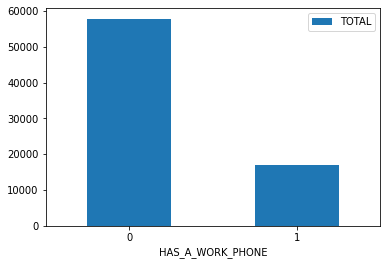

In [471]:
HAS_A_WORK_PHONE.toPandas().set_index("""HAS_A_WORK_PHONE""").plot.bar(rot=1)

## HAS_HOUSE_PHONE

In [472]:
##HAS_HOUSE_PHONE
HAS_HOUSE_PHONE = session.sql("""
SELECT HAS_HOUSE_PHONE, COUNT(HAS_HOUSE_PHONE) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY HAS_HOUSE_PHONE
;""")

HAS_A_WORK_PHONE.toPandas()

,HAS_HOUSE_PHONE,TOTAL
0,0,52789
1,1,22085


<AxesSubplot:xlabel='HAS_HOUSE_PHONE'>

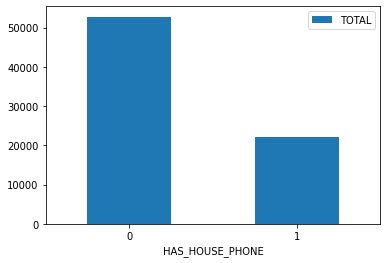

In [476]:
HAS_A_WORK_PHONE.toPandas().set_index("""HAS_HOUSE_PHONE""").plot.bar(rot=1)

## HAS AN EMAIL

In [477]:
##HAS_AN_EMAIL
HAS_AN_EMAIL = session.sql("""
SELECT HAS_AN_EMAIL, COUNT(HAS_AN_EMAIL) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY HAS_AN_EMAIL
;""")


HAS_AN_EMAIL.toPandas()

,HAS_AN_EMAIL,TOTAL
0,0,68100
1,1,6774


<AxesSubplot:xlabel='HAS_AN_EMAIL'>

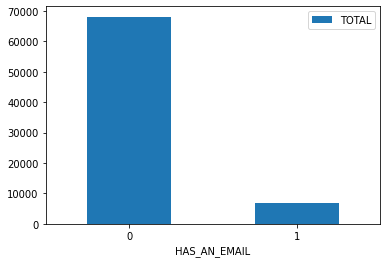

In [478]:
HAS_AN_EMAIL.toPandas().set_index("""HAS_AN_EMAIL""").plot.bar(rot=1)

## FAMILY MEMBER COUNT

In [479]:
## FAMILY MEMBERS COUNT
FAMILY_MEMBERS_COUNT = session.sql("""
SELECT FAMILY_MEMBERS_COUNT, COUNT(FAMILY_MEMBERS_COUNT) AS TOTAL
FROM FILTER_APP_RECORD
GROUP BY FAMILY_MEMBERS_COUNT
ORDER BY FAMILY_MEMBERS_COUNT
;""")

FAMILY_MEMBERS_COUNT.toPandas()

,FAMILY_MEMBERS_COUNT,TOTAL
0,1,14292
1,2,40241
2,3,12932
3,4,6417
4,5,830
5,6,113
6,7,36
7,9,6
8,15,6
9,20,1


<AxesSubplot:ylabel='FAMILY_MEMBERS_COUNT'>

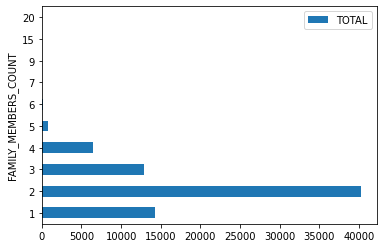

In [483]:
FAMILY_MEMBERS_COUNT.toPandas().set_index("""FAMILY_MEMBERS_COUNT""").plot.barh()